In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from sklearn.cluster import KMeans

C:\Users\Rathang Rajpal\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rathang Rajpal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Rathang Rajpal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
orders  = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\orders.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
department = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\departments.csv')
aisles = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\aisles.csv')

In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
products = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
prod_order = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\order_products__train.csv')

In [10]:
prod_order.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
prod_order_p = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\order_products__prior.csv')

In [12]:
prod_order_p.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
prod_dept = products.merge(department,how = 'left',on = 'department_id')
prod_dept.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [14]:
product_dept = prod_dept.set_index('product_id').drop(['product_name','aisle_id','department_id'],axis = 1)

In [15]:
product_dept.head()

,department
product_id,
1,snacks
2,pantry
3,beverages
4,frozen
5,pantry


In [16]:
d = {}
for i in product_dept.index:
    d[i] = product_dept['department'][i]

In [17]:
d[29429]

'breakfast'

In [18]:
customer_orders = pd.merge(orders,prod_order,on = 'order_id')

In [19]:
customer_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [28]:
cod = pd.merge(customer_orders,product_dept,how = 'left',on = 'product_id')

In [38]:
cod.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department
0,1187899,1,train,11,4,8,14.0,196,1,1,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,snacks
5,1187899,1,train,11,4,8,14.0,10258,6,1,snacks
6,1187899,1,train,11,4,8,14.0,13032,7,1,breakfast
7,1187899,1,train,11,4,8,14.0,26088,8,1,snacks
8,1187899,1,train,11,4,8,14.0,27845,9,0,dairy eggs
9,1187899,1,train,11,4,8,14.0,49235,10,1,dairy eggs


In [30]:
tdf = pd.crosstab(cod.user_id,cod.department)

In [31]:
tdf.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [33]:
print(tdf.shape)

(131209, 21)


In [34]:
tdf1 = tdf[:30000]

In [36]:
print(tdf1.shape)

(30000, 21)


In [37]:
tdf1.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [59]:
X = tdf1
pca = PCA(n_components=5, whiten=True).fit(X)
X_pca = pca.transform(X)

In [60]:
print(pca.components_)

[[-6.62015558e-03  1.39078600e-02  4.09670058e-02  1.74928741e-02
   2.00256970e-02  2.28198094e-03  6.28371430e-02  2.45852398e-01
   4.79985060e-02  4.54430729e-02  7.46381588e-02 -6.37055025e-03
   1.54679703e-02  3.47135704e-02  8.79896917e-03  8.08334226e-04
   7.41430684e-02 -7.68591272e-04 -7.67224880e-04  9.54599616e-01
   6.86933122e-02]
 [-6.19024690e-04  3.53942141e-02  1.05441008e-01  2.59183556e-01
   8.98687700e-02 -6.48982554e-05  6.27151352e-02  7.12113190e-01
   8.38109998e-02  8.30106162e-02  3.02544327e-01  5.28835654e-02
   1.47976202e-02  3.21828020e-02  1.67506772e-02  2.47629716e-03
   1.33126633e-01  2.92279426e-02  7.60643560e-03 -2.74537687e-01
   4.44461676e-01]
 [ 2.75246976e-03 -2.05819067e-02 -2.33686570e-03  3.54555467e-01
   3.25787924e-02  1.47272565e-03  3.24899954e-03 -6.06331048e-01
   2.67569153e-02 -2.75631118e-03  1.74067359e-01  4.84057020e-02
   5.47520997e-03 -9.23135816e-03  7.48726010e-03  1.61253616e-03
   4.74928590e-03  2.63231521e-02  6.5

In [61]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.47037583 0.13475355 0.07771766 0.05910639 0.05598297]
0.7979363945592234


In [65]:
w = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    w.append(kmeans.inertia_)

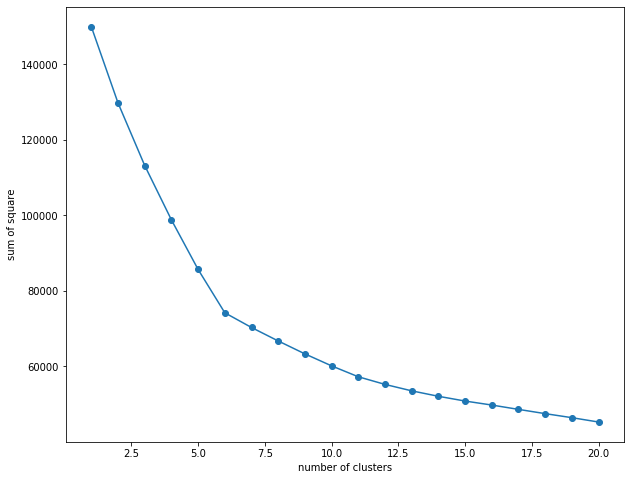

In [66]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21),w,marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('sum of square')
plt.show()

In [71]:
fin_cluster =  KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [72]:
fin_cluster.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [74]:
tdf1_cl = pd.concat([tdf1.reset_index(drop =True),pd.DataFrame(X_pca)], axis = 1)
tdf1_cl.columns.values[-5:] = ['component 1','component 2', 'component 3', 'component 4','component 5']
tdf1_cl['segment'] = fin_cluster.labels_

In [75]:
tdf1_cl.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,personal care,pets,produce,snacks,component 1,component 2,component 3,component 4,component 5,segment
0,0,0,0,2,1,0,0,4,0,0,...,0,0,0,3,-0.678280,1.804987,0.036819,-1.598038,0.209119,3
1,0,0,0,0,0,0,3,1,3,0,...,1,0,7,5,1.345711,1.787356,3.515405,6.276190,-3.285158,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,4,0,0.145503,-0.833145,-0.384062,-0.179885,-0.155425,5
3,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,-0.633598,0.255722,0.619014,-0.251021,3.346709,2
4,0,0,1,0,0,0,1,1,1,0,...,0,0,13,0,2.601123,-2.044155,0.127294,-0.199046,-0.047916,1


In [76]:
tdf1.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [77]:
tdf1_cl['segment_name'] = tdf1_cl['segment'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})

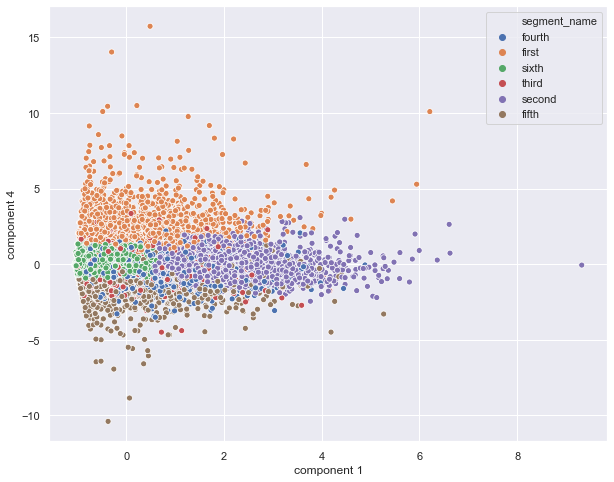

In [82]:
x_axis = tdf1_cl['component 1']
y_axis = tdf1_cl['component 4']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = tdf1_cl['segment_name'],)
plt.show()